Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [37]:
import tensorflow as tf


**Gradient**

Możliwe jest wyliczenie gradientu dowolnego wyrażenia różniczkowalnego. Wykorzystujemy do tego metodę **tf.GradientTape()**


Funkcja **jednej zmiennej**:

In [38]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    f = x**3                     #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f, x)  #gradient 'f' ze względu na zmienną 'x'

df_dx.numpy()

48.0

Funkcja **dwóch zmiennych**:

In [39]:
x = tf.Variable(4.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = x**3+y**2                         #definicja funkcji f(x,y)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'y'

print(df_dx)
print(df_dy)

tf.Tensor(48.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Przykład z **prezentacji**:

In [40]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = (x**2)*y                          #definicja funkcji f(x,y)=x^2*y
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'y'

print(df_dx)
print(df_dy)

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)


Trochę skomplikujemy:

In [41]:
x = tf.Variable([3.0,2.0])

with tf.GradientTape() as tape:
    f = (x**3)                  #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f,x)  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)


I jeszcze trochę skomplikujemy:

In [42]:
x = tf.Variable([3.0,2.0])
y = tf.Variable([1.0,0.0])

with tf.GradientTape() as tape:
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)
tf.Tensor([2. 0.], shape=(2,), dtype=float32)


Zmienne mogą być zastąpione przez tensory, wówczas konieczne jest **rejestrowanie wprost** operacji zastosowanych do tych sensorów. Służy do tego metoda **watch()**. W przypkadku zmiennych operacje są rejestrowane automatycznie.

In [43]:
x = tf.random.normal([2])
y = tf.random.normal([2])

print(x)
print(y)

with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([-1.8064721 -1.0134428], shape=(2,), dtype=float32)
tf.Tensor([-0.59937334  0.14433193], shape=(2,), dtype=float32)
tf.Tensor([9.790023  3.0811987], shape=(2,), dtype=float32)
tf.Tensor([-1.1987467  0.2886639], shape=(2,), dtype=float32)


In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
number_of_points = 1000
x_point = []
y_point = []

In [46]:
a = 0.22
b = 0.78

In [47]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

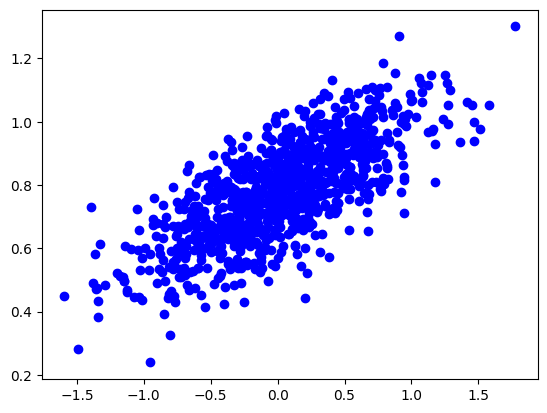

In [48]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [49]:
x_point

[0.7125548466680154,
 0.37674383920735927,
 0.5626668660711596,
 -0.2932150129123768,
 0.4561011083319725,
 -0.27148779061525924,
 -0.34939658620013275,
 -0.7217541336286267,
 -0.3675282463881703,
 -0.12067186926339572,
 -0.04983903534408867,
 0.5717850379001476,
 -0.8865426754753957,
 0.2062242668233041,
 0.12420808824267884,
 0.5565558307310817,
 0.7237352975752456,
 -0.09148392393296449,
 -0.22507956367008283,
 0.7888924417703018,
 -0.31452600142007137,
 0.48497315589518497,
 0.12112186361985432,
 -0.2976501050734315,
 0.14307071230046903,
 -0.4836080241590283,
 -0.24229810432602208,
 0.24872435820659436,
 -0.3348660554332838,
 0.2032690504595579,
 -0.11404787648305591,
 0.07549604406209061,
 0.2530889246034106,
 0.9756363492720084,
 -0.27548160836282837,
 -0.11786977809499255,
 -0.0889969981808418,
 -0.14883707571338864,
 0.4929275586809698,
 -0.00106630105739447,
 0.18808458076917103,
 0.2642177435098238,
 0.14041810502504729,
 0.23512404384903784,
 -0.5274307395879526,
 0.3043048

In [50]:
real_x = np.array(x_point)
real_y = np.array(y_point)

Definicja błędu:

In [51]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [52]:
x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x).numpy()

2.5

In [53]:
import random

TODO

In [54]:
Loss = []
epochs = 1000
learning_rate = 0.001

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db



Wykres zmian błędu:

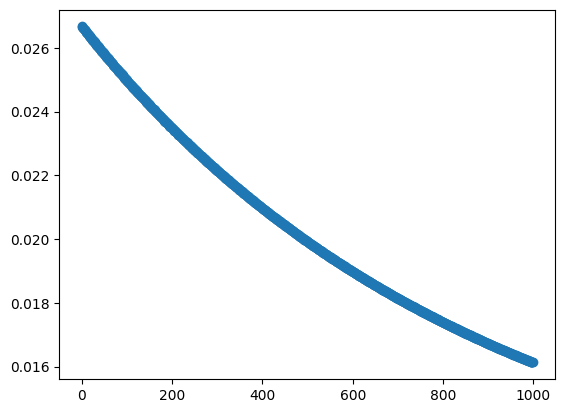

In [55]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [56]:
max = np.max(x_point)
min = np.min(x_point)

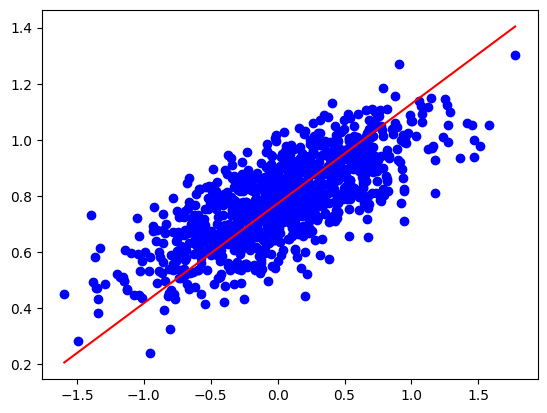

In [57]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()